/var/folders/45/l9pwq7313tb9ss_6yl0pxhp00000gn/T/ipykernel_35019/135204609.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SC'][i]=0.33
/var/folders/45/l9pwq7313tb9ss_6yl0pxhp00000gn/T/ipykernel_35019/135204609.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SC'][i]=0.66
/var/folders/45/l9pwq7313tb9ss_6yl0pxhp00000gn/T/ipykernel_35019/135204609.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SC'][i]=0
/var/fo

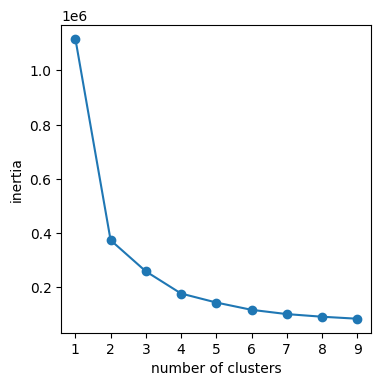

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
df = pd.read_csv('Health_Condition_Level.csv')

##############################
#string value to float64 value
##############################
#SC
#0 no -> 0
#1 Sometimes -> 0.33
#2 Frequently -> 0.66
#3 Always -> 1
for i, x in enumerate(df['SC']):
    if (df['SC'][i]=='no'):
        df['SC'][i]=0
    if (df['SC'][i]=='Sometimes'):
        df['SC'][i]=0.33
    if (df['SC'][i]=='Frequently'):
        df['SC'][i]=0.66
    if (df['SC'][i]=='Always'):
        df['SC'][i]=1
df = df.astype({'SC':'float64'})
#Smoker -> binary
#0 no
#1 yes
for i, x in enumerate(df['Smoker']):
    if (df['Smoker'][i]=='no'):
        df['Smoker'][i]=0
    if (df['Smoker'][i]=='yes'):
        df['Smoker'][i]=1
df = df.astype({'Smoker':'float64'})
#Medical_history -> binary
#0 no
#1 yes
for i, x in enumerate(df['Medical_history']):
    if (df['Medical_history'][i]=='no'):
        df['Medical_history'][i]=0
    if (df['Medical_history'][i]=='yes'):
        df['Medical_history'][i]=1
df = df.astype({'Medical_history':'float64'})
#AC
#0 no -> 0
#1 Sometimes -> 0.33
#2 Frequently -> 0.66
#3 Always -> 1
for i, x in enumerate(df['AC']):
    if (df['AC'][i]=='no'):
        df['AC'][i]=0
    if (df['AC'][i]=='Sometimes'):
        df['AC'][i]=0.33
    if (df['AC'][i]=='Frequently'):
        df['AC'][i]=0.66
    if (df['AC'][i]=='Always'):
        df['AC'][i]=1
df = df.astype({'AC':'float64'})
#HSM -> binary
#0 no
#1 yes
for i, x in enumerate(df['HSM']):
    if (df['HSM'][i]=='no'):
        df['HSM'][i]=0
    if (df['HSM'][i]=='yes'):
        df['HSM'][i]=1
df = df.astype({'HSM':'float64'})
#Sex -> binary
#0 Female
#1 Male
for i, x in enumerate(df['Sex']):
    if (df['Sex'][i]=='Female'):
        df['Sex'][i]=0
    if (df['Sex'][i]=='Male'):
        df['Sex'][i]=1
df = df.astype({'Sex':'float64'})
#################################

inertias = []
x_list = range(1,10)
for x in x_list:
    model = KMeans(n_clusters=x)
    model.fit(df)
    inertias.append(model.inertia_)
#Draw Plot (x axis = n_clusters, y axis = inertias)
plt.figure(figsize=(4, 4))
plt.plot(x_list, inertias, '-o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(x_list)
plt.show()

#분석 결과 n_clusters의 값이 3일 때 최적이므로 해당 값으로 model 생성 
model = KMeans(n_clusters = 3, random_state=100)
#앞에서 생성한 model로 fit을 한다.
model.fit(df) #비지도 학습
#centers에 해당 내용 저장 (centers = 클러스터의 중심점, predict = 예측 클러스터)
predict = model.predict(df)

#save to csv data with id predict
id = list(range(0,1839))
df = pd.DataFrame({'id' : id, 'predict' : predict })
df.to_csv('submission_cluster.csv',index=False)